## Dimension Reduction w/ PCA and Kernel PCA


In [1]:
import pandas as pd
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris,make_circles
from pandas.tools.plotting import parallel_coordinates
np.random.seed(0)

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

### Eigenvalues and Eigenvectors

- In Principal Components Analysis, eigenvectors and eigenvalues are at the core of this algorithm. The principal components are nothing more than the extracted eigenvectors and eigenvalues from a correlation matrix. Using a non-mathematical definition, one can view the eigenvectors as the slope of axes defining a series of ellipses, with the axes always orthogonal to each other.


- The eigenvectors of the correlation or covariance(i.e. data is standardized) matrix represents the principal components (directions of maximum variance and determined the direction of the new feature space) and the eigenvalues (scalar) correspond to the magnitude of the eigenvectors. The eignevalues explains the variance along the new featue axes.  


- Eigenvectors can be used to create a linear equation, much like a regression equation, to create new properties and to help classify the original data samples into different groupings. The eigenvector with the largest eigenvalue is the direction along which the data set has the maximum variance


- Any scalar value lambda for which satifies the equation below is known as the eigenvalue of matrix A if there exists a non-zero vector x. If x is an eigenvector of the matrix A, then A multiplied by x is equal to $\lambda$ multiplied by x. 

$$Ax=\lambda{x}$$

$$Ax=\lambda{Ix}$$

$$(A-\lambda{I})x = 0$$

$$det(A-\lambda{I})x = 0$$

Where

- If $A-\lambda{I} = 0$ the matrix is 'singular' 

- We want to find lambda such that $det(A-\lambda{I}) = 0$ (i.e. polynomial eq.)

- $\lambda$ is the eigenvalues (i.e. scalar value)

- A is a nxn matrix

Quick illustration, from the code below we can see that there is no lambda multiplied by x (assuming values of x for now) that would equal Ax. Therefore, x is not an eigenvector of the matrix A. That is, Ax and x point in opposite directions.

In [2]:
#Inpur Matrix
A = np.array([[3,-1],[-1,3]])

#Try 
x = np.array([[1],[0]])

#Ax
Ax = np.dot(A,x)

print(Ax)

[[ 3]
 [-1]]


On the other hand, if we have a vector x = [1,1] then x and Ax point in the same direction. Therefore, 2x = Ax and thus the eigenvalue is 2 (i.e. stretch) and x is an eigenvector of the matrix A. 

In [3]:
#Try 
x = np.array([[1],[1]])

#Ax
Ax = np.dot(A,x)

print(Ax)

[[2]
 [2]]


Similarly, if we have a vector x = [1,-1] then x and Ax point in the same direction. Hence, 4x = Ax and thus the eigenvalue is 4 (i.e. stretch) and x is an eigenvector of the matrix A. 

In [4]:
#Try 
x = np.array([[1],[-1]])

#Ax
Ax = np.dot(A,x)

print(Ax)

[[ 4]
 [-4]]


**Computing Eigenvalues and Eigenvectors using Numpy**

In [5]:
eig_val,eig_vec = np.linalg.eig(A)
print('Eigenvalues: ',eig_val)
print('Eigenvector: ',eig_vec)

Eigenvalues:  [ 4.  2.]
Eigenvector:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


### Singular Value Decomposition

- In this section, we will utilize linear dimensionality reduction by applying Singular Value Decomposition of the data to project it to a lower dimensional space. SVD is similar to PCA, except the factorization for SVD is performed on the data matrix while PCA uses the covariance matrix. 

<img src = "../sources/svd.png">


It is always possible to decompose a real matrix A into A = $U\sum{V^{T}}$. This expression states that for any arbitrary matrix A, it can be converted into an orthogonal, diagonal, and orthogonal matrix (i.e. rotation,stretch,rotate).

*Where:*
- N = Number of instances in dataset
- P = Number of attributes in dataset
- A = Returns NxP matrix 
 
 
- U = Is the Left Singular Vectors -- the eigenvectors of $AA^{T}$ that make up the columns the U vector. *U* is the coordinates of the rows of the data onto the principal axes (nxp matrix)


- Sigma = Is the Singular Values, which is the square roots of the eigenvectors and are the diagonal entries of the S matrix and arranged in descending order (pxp matrix)


- $V^{T}$ = Is the Right Singular Vectors. The eigenvectors of $A^{T}A$ make up the columns of V. (returns a pxp matrix)


** Additional Notes**
- U and V are orthogonal 
- The singular values of the data matrix ($\sigma$)are not the same as the eigenvalues obtained from the covariance matrix


**Example**

Observations:  1000
Attributes:  2
============== SVD ==============
U Shape: (1000, 2)
S Shape: (2,)
V Shape: (2, 2)


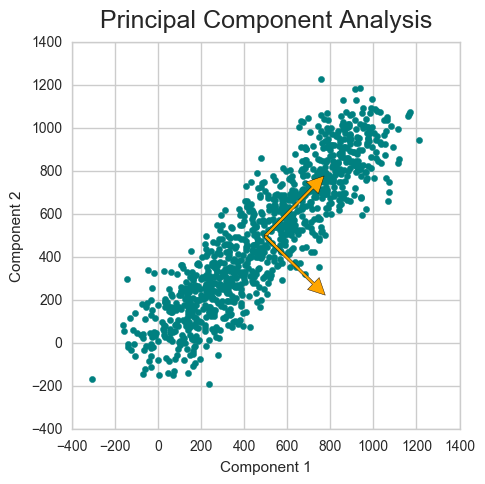

In [31]:
def make_data(N=1000):

    """ 
    Parameters
    ----------
    N: Number of instances
    
    Returns
    -------
    Numpy array with two attributes
    
    """
    X = np.linspace(0,N,N)
    Y = X
    xx = (X + np.random.normal(0, 100, N)).reshape(N,1)
    yy = (Y + np.random.normal(0, 100, N)).reshape(N,1)
    data = np.hstack((xx,yy))
    
    print('Observations: ',data.shape[0])
    print('Attributes: ',data.shape[1])
    return(data)

def center_data(X):
    
    return(X - X.mean(axis=0))

def _SVD(X):
    
    print('============== SVD ==============')
    
    mu = np.mean(X,axis=0)
    data_center = center_data(X)
    
    #Apply Singular Value Decomposition
    U,S,V = np.linalg.svd(data_center, full_matrices=False)
    
    print('U Shape:', U.shape)
    print('S Shape:', S.shape)
    print('V Shape:', V.shape)
    
    #Project data onto new axes
    projected_data = np.dot(data_center,V.T)
    
    #Eigenvalues
    sigma = projected_data.std(axis=0).mean()
    
    #Plot Eigenvectors/vals
    plot(X,mu,sigma,V)

def plot(X,mu,sigma,V):      
    
    #Set up visualization 
    fig = plt.figure(figsize=(10,5)) 
    ax = fig.add_subplot(111)
    
    #Plot original data
    ax.scatter(X[:,0],X[:,1],color='teal')

    #Iterate over each component (i.e. 2 vectors)
    for components in V:

        #Multiply Eigenvalues by 'N' for visualizations
        start, end = mu, mu + (sigma * components)*1.5

        #Plot arrows
        ax.annotate(s='',xytext=start,xy=end,
                    arrowprops=dict(facecolor='orange', width=2.0))
        
    #Provide labels/title
    ax.set_aspect('equal')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title('Principal Component Analysis',fontsize=18,y=1.02)


if __name__ == '__main__':
    
    d = make_data()
    
    _SVD(d)

### Example with Iris Dataset

In [16]:
X = pd.DataFrame(load_iris().data)
X.columns  = load_iris().feature_names
y = pd.DataFrame(load_iris().target,columns=['Target'])

print('Observations: ',X.shape[0])
print('Features: ',X.shape[1])
print('Class Labels: ',y['Target'].unique())

Observations:  150
Features:  4
Class Labels:  [0 1 2]


** Standardize Data **

Standardize the data to mean = 0 and standard deviation of 1. This can be applied using *sklearn.preprocessing.StandardScalar()* or by applying the following equation:

$$Z = \frac{(x-\mu)}{\sigma}$$

$$Mean = \frac{1}{N}\sum_{i=1}^{N}(x_{i})$$

$$Stddev = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^{2}}$$

In [47]:
def standardize(X):

    """ Standardize Input Data """
    
    for c in X.columns:
        X[c] = (X[c] - X[c].mean()) / X[c].std()
    return(X)

X_std = standardize(X)

#X_std = StandardScaler().fit_transform(X)

** Visualization for Dimensionality Reduction **

In [45]:
def dimension_reduction_plot(X,y):
    
    plt.figure(figsize=(6, 4))
    
    for label,color in zip((0,1,2),('teal', 'orange', 'gray')):
        
        plt.scatter(X[y.ix[:,0] ==label, 0],X[y.ix[:,0] ==label, 1],
                    label=label,c=color,s=50,edgecolor='w')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc=(1.02,0.50),frameon=False)
        plt.title('Dimensionality Reduction',fontsize=16,y=1.02)

### Apply Singular Value Decomposition 

In [400]:
def do_SVD(X):

    print ('=================  SVD  =================')
    
    #Compute AA^T and A^TA Matrices
    try:
        AA_T = np.dot(X,np.transpose(X)) 
        AT_A = np.dot(np.transpose(X),X) 
    
    except:
        print("Unexpected Error:", sys.exc_info()[0])

    #Compute U,S,V.T
    try:
        U = np.linalg.eig(AA_T)[1] #Eigenvectors of XX.T
        S = np.sqrt(np.linalg.eigvals(AT_A)) #Singular Values
        VT = np.linalg.eig(AT_A)[1].T #Eigenvectors of X.TX
    except:
        print("Unexpected Error:", sys.exc_info()[0])
      
    
    #Explained Variance Ratio
    S_ratio = [(i+1,s/np.sum(S)) for i,s in enumerate(sorted(S,reverse=True))]
    for i in S_ratio:
        print('{0:.0f} Component --  Variance Explained {1:.3f}'.format(i[0],i[1]))

    return(U,np.diag(S),VT)

U,S,VT = do_SVD(X_std)

=================  SVD  =================
1 Component --  Variance Explained 0.534
2 Component --  Variance Explained 0.301
3 Component --  Variance Explained 0.120
4 Component --  Variance Explained 0.045


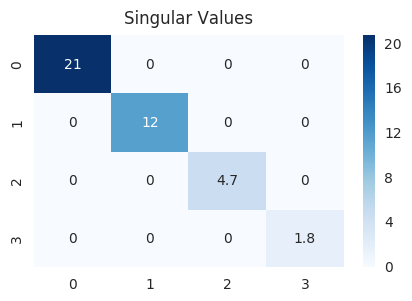

In [401]:
#Singular Values
plt.figure(figsize=(5,3))
sns.heatmap(S,annot=True,cmap="Blues")
plt.title('Singular Values',y=1.02)

### Singular Value Decomposition w/ Numpy

In [579]:
U,S,VT = np.linalg.svd(X_std,full_matrices=False)

print('U Shape: ',U.shape)
print('S Shape: ',S.shape)
print('VT Shape: ',VT.shape)

U Shape:  (150, 4)
S Shape:  (4,)
VT Shape:  (4, 4)


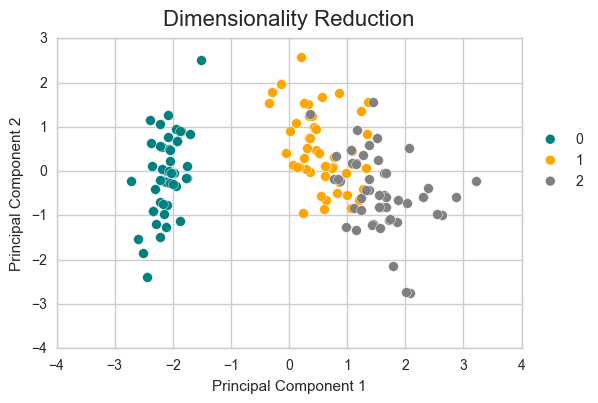

In [319]:
proj = X_std.dot(VT[:,:2]).values
dimension_reduction_plot(proj,y)

In [408]:
#Reconstruction of Original Data
orig = np.dot(U.dot(np.diag(S)),VT.T)
pd.DataFrame(orig,columns=X.columns).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.962597,1.302742,-1.537031,-0.614083
1,-1.068448,0.158125,-1.754531,-0.753497
2,-1.330550,0.584171,-1.788804,-0.602099
3,-1.445301,0.330675,-1.738841,-0.628522
4,-1.100048,1.511755,-1.527195,-0.542681


### Eigenvector Decomposition of the Covariance Matrix

In [315]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(X_std.T))
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

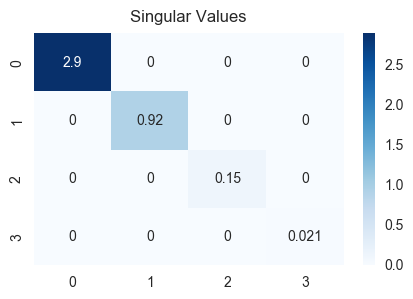

In [316]:
plt.figure(figsize=(5,3))
sns.heatmap(np.diag(eig_vals),annot=True,cmap="Blues")
plt.title('Singular Values',y=1.02)

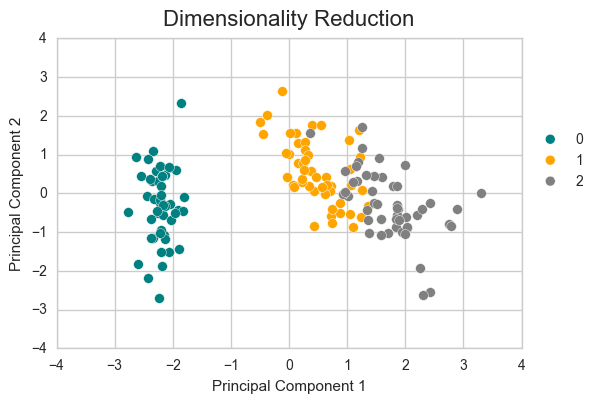

In [317]:
proj = X_std.dot(eig_vecs[:,:2]).values
dimension_reduction_plot(proj,y)

### Eigenvector Decomposition of the Covariance Matrix (Raw)

- Note: the eigen decomposition of the correlation matrix yields the same results as decomposing the correlatin matrix of the standardized data. The correlation matrix is understood as the normalized covariance matrix and hence is equilvalent to the decomposition of the covariance matrix (i.e. if standardized).

In [312]:
eig_vals, eig_vecs = np.linalg.eig(np.corrcoef(X.T))
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

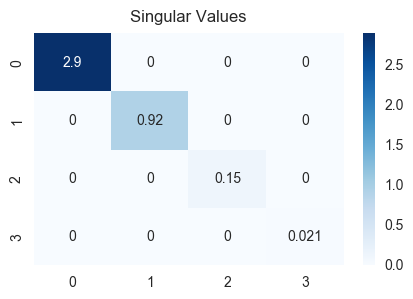

In [313]:
plt.figure(figsize=(5,3))
sns.heatmap(np.diag(eig_vals),annot=True,cmap="Blues")
plt.title('Singular Values',y=1.02)

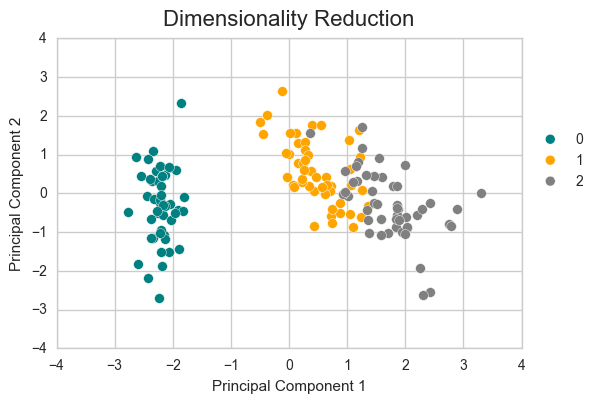

In [314]:
proj = X_std.dot(eig_vecs[:,:2]).values
dimension_reduction_plot(proj,y)

### Eigenvector Decomposition of the Correlation Matrix (Standardized)

In [308]:
eig_vals, eig_vecs = np.linalg.eig(np.corrcoef(X_std.T))

In [309]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

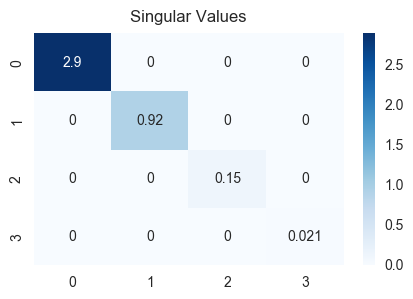

In [310]:
plt.figure(figsize=(5,3))
sns.heatmap(np.diag(eig_vals),annot=True,cmap="Blues")
plt.title('Singular Values',y=1.02)

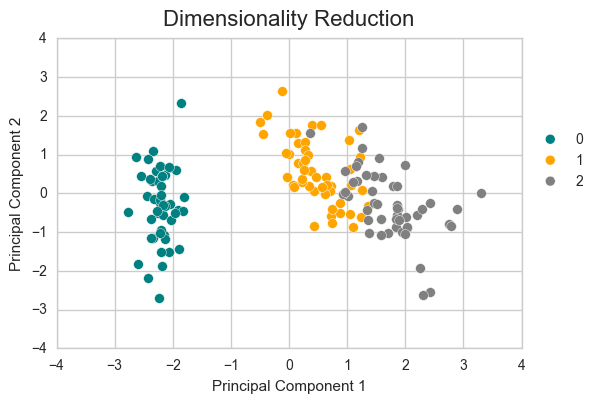

In [311]:
proj = X_std.dot(eig_vecs[:,:2]).values
dimension_reduction_plot(proj,y)

### Scikit-Learn PCA

Note: PCA can only be interpreted as the Singular Value Decomposition of a data matrix when the columns have been centered by their means beforehand. Note that the direction (i.e. +/-) might differ from np.linalg.svd and PCA in Sklearn. However, if you change the signs of the components, then you do not change the variance that is contained in the 'nth' component. Thus, the sign depends mostly on how the algorithm solves the eigenvector problem; eigenvalue decomposition or SVD solution may differ in signs, but maintaining the same loading magnitudes.

For Sklearns implementation of PCA, the [code](https://github.com/scikit-learn/scikit-learn/blob/4c65d8e/sklearn/decomposition/pca.py#L391) in line 391 states:

```python
U, S, V = linalg.svd(X, full_matrices=False)
# flip eigenvectors' sign to enforce deterministic output
U, V = svd_flip(U, V)
```

In [242]:
var_ratio = [i/np.sum(v) for i in v]
components = np.arange(1,len(v)+1,1)

print(var_ratio)
# plt.bar(components,var_ratio)

[0.72770452093801341, 0.23030523267680636, 0.03683831957627394, 0.0051519268089063215]


In [303]:
def scree_plot(var):
    
    var_ratio = [i/np.sum(var) for i in var]
    components = np.arange(1,len(var)+1,1)

    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111)
    ax1 = ax.twinx()
    
    ax.bar(components,height=var_ratio,color='teal',width=0.70,align='center')
    ax.set_ylim(0,1)
    ax.set_xticks(np.arange(1,len(var)+1,1))
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_xlabel('Principal Components')
    
    ax1.plot(components,np.cumsum(var_ratio),color='red',lw=3.5,label='Cum Explained Variance')
    ax1.set_ylabel('Cumulative Expained Variance')
    
    ax.legend(frameon=False)
    ax.grid(False)
    ax1.grid(False)
    plt.title('Principal Component Analysis: Scree Plot',fontsize=18,y=1.02)

In [304]:
def do_PCA(X):
    
    pc = PCA(n_components=X.shape[1])
    pc.fit(X_std)
    pcs = pc.fit_transform(X_std) 
    
    #Explained_Variance
    var = pc.explained_variance_
    
    #Explore Explained Variance / Cum. Variance
    scree_plot(var)

    #Projection
    #proj = np.dot(X_std,pc.components_.T)
    
    return(var)

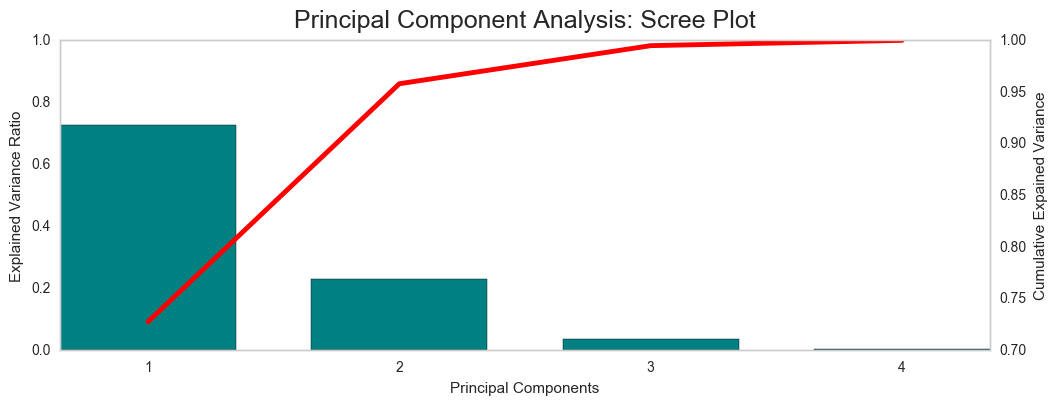

In [305]:
v = do_PCA(X_std)

- Examining the scree plot above, the first two principal components account for roughly 95% of the total variance. Thus the dimensionality of the dataset is reduced from 4 dimensions to 2 and still preserve most of the information in the data

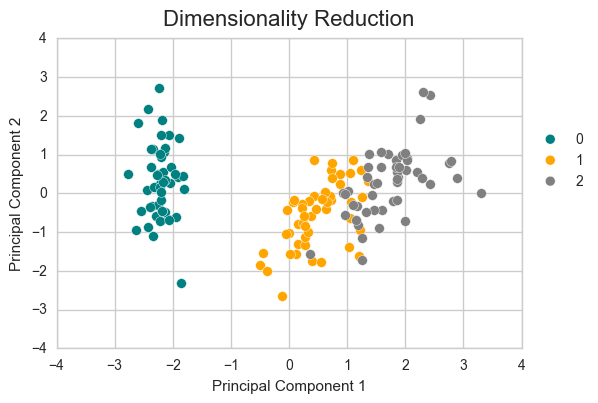

In [306]:
optimal_pcs = 2
pc = PCA(n_components=optimal_pcs)
pc.fit(X_std)
pcs = pc.fit_transform(X_std) 
dimension_reduction_plot(pcs,y)

## Examine Principal Components

In [179]:
def pc_comparison(df_pcs,pcs):
    
    fig = plt.figure(figsize=(17,12))
    layout = (2,1)
    ax = plt.subplot2grid(layout,(0,0),colspan=1)
    parallel_coordinates(df_pcs,'Target',color=['teal', 'orange', 'gray'],alpha=0.30,lw=1.50,ax=ax)
    ax.set_title('Parallel Coordinates',fontsize=20,y=1.02)

    ax1 = plt.subplot2grid(layout,(1,0),colspan=1)
    ax1.imshow(pcs,aspect='auto',cmap='summer',interpolation='nearest',alpha=0.90)
    ax1.grid(False)
    ax1.set_ylabel('Observation')
    ax1.set_xlabel('Principal Components')
    ax1.set_title('Principal Component Segmentation',fontsize=20,y=1.02)
    
def pc_1d_projection_plot(X,y,n_components=4):
    
    n_labels = len(y.Target.unique())
    colors = ['teal', 'orange', 'gray']

    fig = plt.figure(figsize=(15,10))
    fig.subplots_adjust(hspace=0.50)

    for i in range(0,n_components):
        ax = fig.add_subplot(n_components,1,i+1)

        #Principal Component Projection
        pc = PCA(n_components=i+1)
        pc.fit(X)
        pcs = pc.fit_transform(X) 

        for color,label in zip(colors,range(0,n_labels)):

            #Set up Visualization
            d = pcs[y.ix[:,0] == label, i]
            ax.scatter(d,np.zeros((len(d),1)),s=30,edgecolor='w',c=color,label=label)
            ax.legend(loc='upper left')
            ax.set_title('Principal Component {} -- 1D Projection'.format(i+1),fontsize=16)

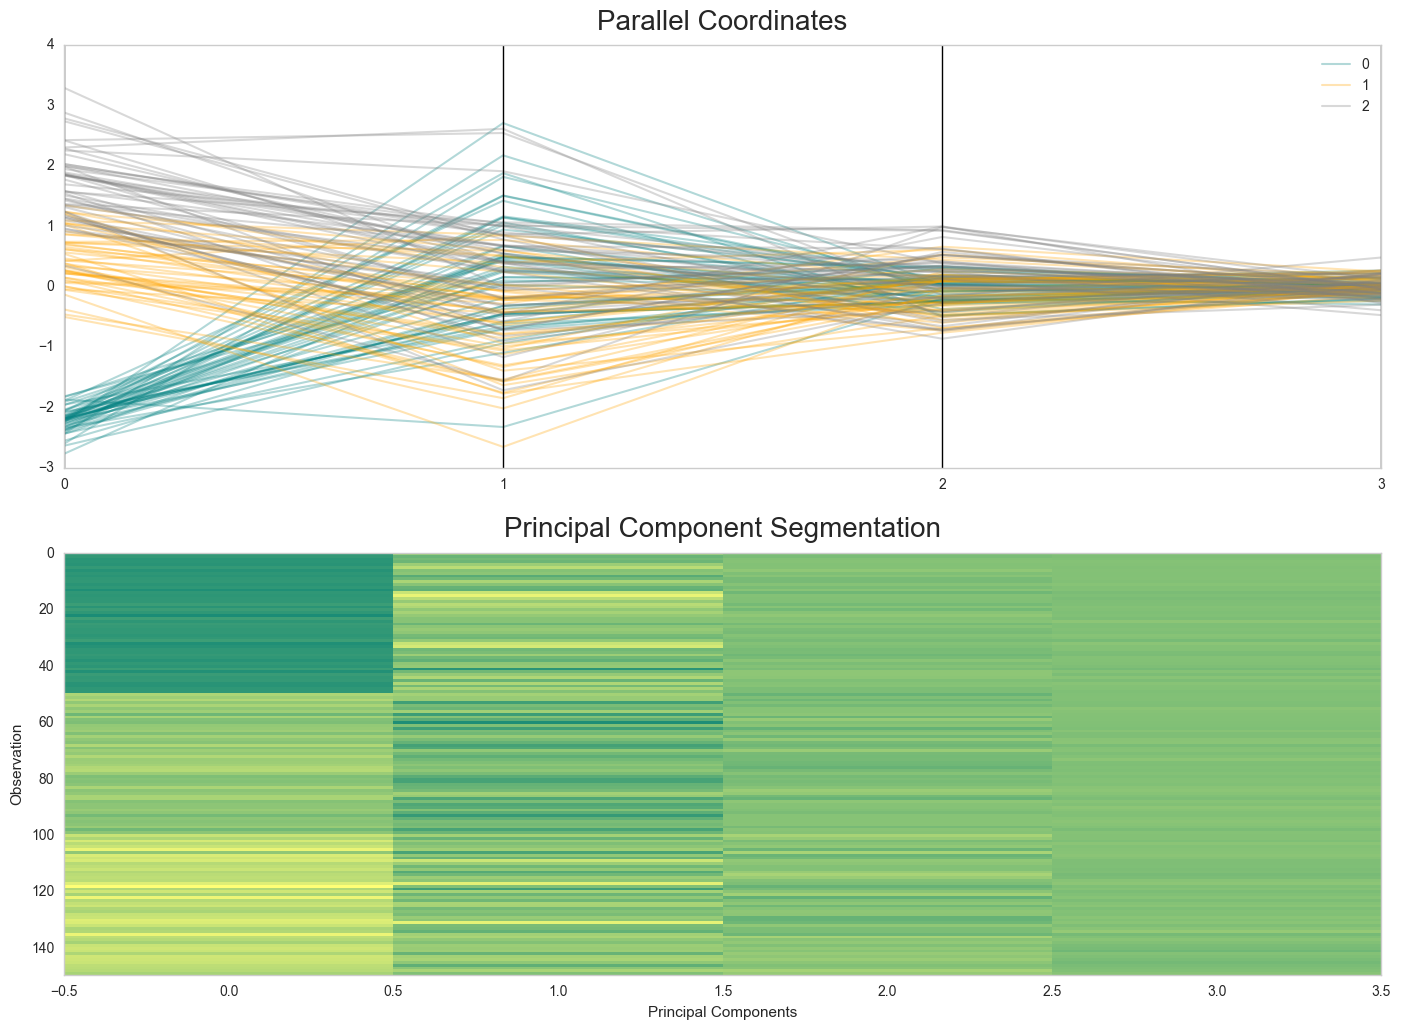

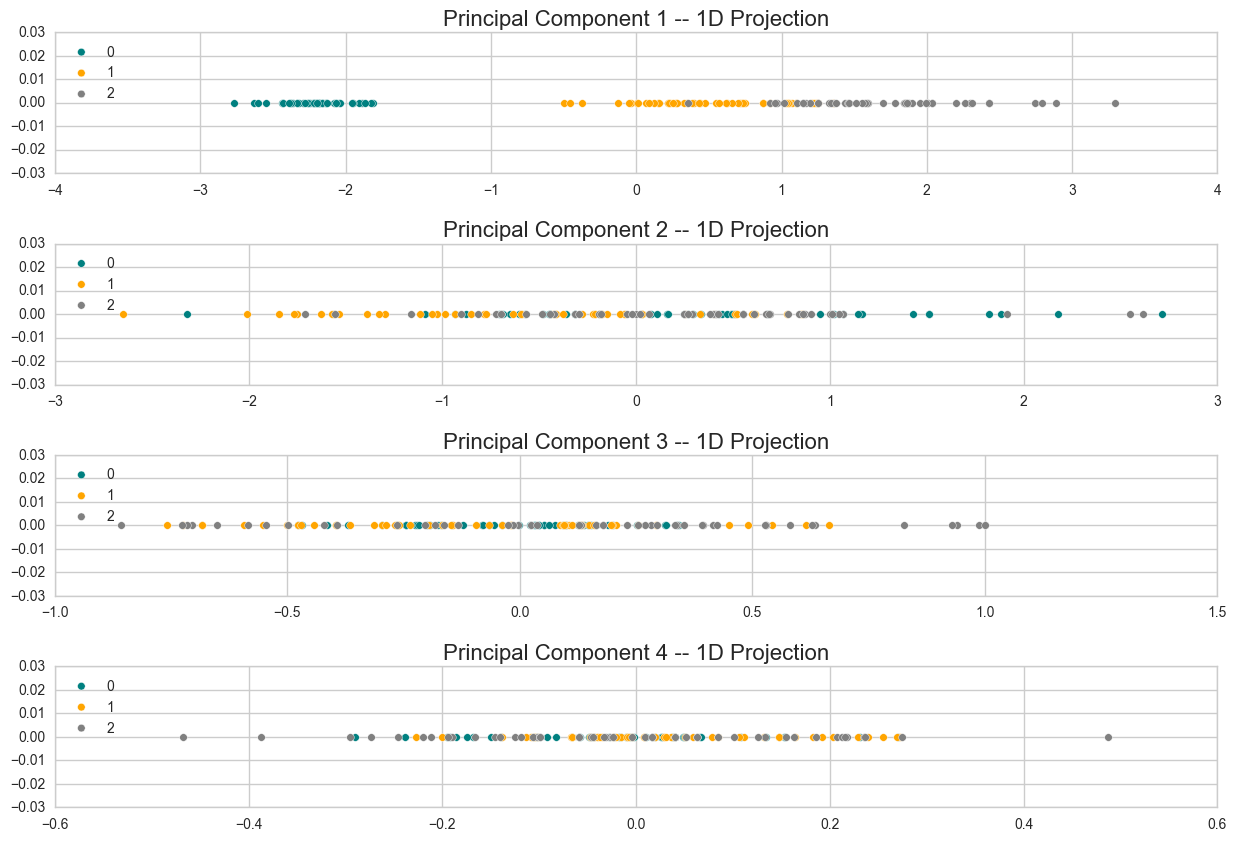

In [180]:
if __name__ == '__main__':
    
    # Features and Target DataFrame
    df_pcs = pd.DataFrame(pcs)
    df_pcs['Target'] = y
    
    #Parallel Coord Plot and Imshow
    pc_comparison(df_pcs,pcs)
    
    #1D Projection Plot
    pc_1d_projection_plot(X_std,y)

### Kernel PCA

- Above we looked at applying linear PCA to the Iris dataset. We see that the first principal component does a descent job of segmenting the classes and gives a good representation of the data in the 1D space. The Linear PCA approach only works well if the data is linearly separable. In practice, not every dataset is linearly separable and thys we need to look a nonlinear technique that transforms the data to be linearly separable by applying the Kernel Trick. 


- The intuition behind transforming non-linear data into linearly separable is to project the data onto a higher dimensional feature space by using a non-linear mapping function $\phi$. Hence, the Kernel Function is given by X --> ${\phi}$(x). The Kernel Function maps the original d-dimensional features into a larger feature space (k>d) by generating a set of non-linear combinations of the original attributes.


### Create Non-Linear Dataset 

 - Apply Linear PCA and Kernel PCA to Dataset

In [535]:
#Make Data
np.random.seed(0)
X,y = make_circles(n_samples=400, factor=.3, noise=.05)

#Linear PCA
pc = PCA(n_components=2)
pcs = pc.fit_transform(X)

#Kernel PCA
kpc = KernelPCA(n_components=2,kernel="rbf", fit_inverse_transform=True, gamma=10)
kpcs = kpc.fit_transform(X)

**Examine Results**

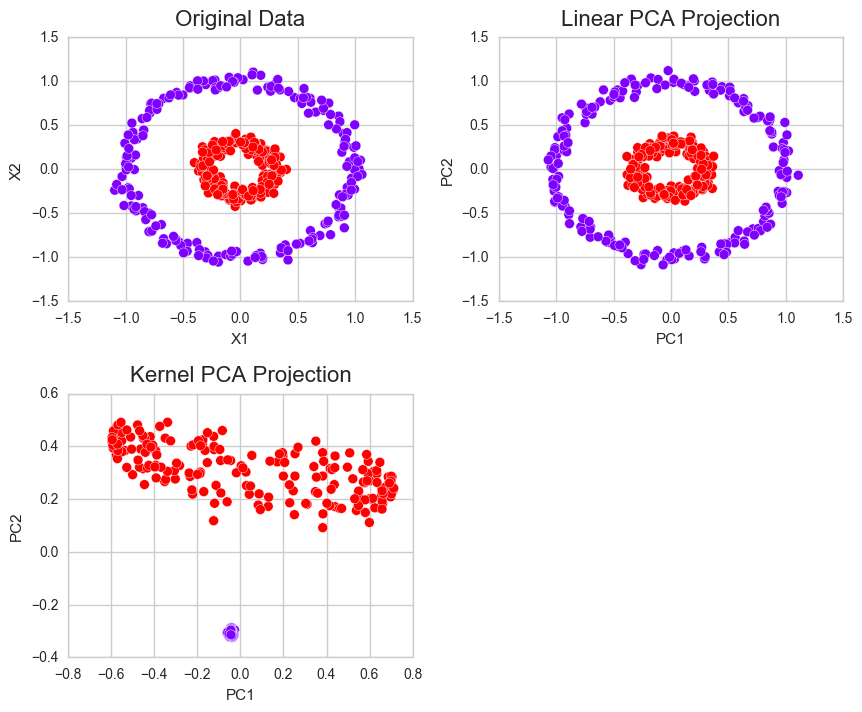

In [536]:
fig = plt.figure(figsize=(10,8))
layout = (2,2)

fig.subplots_adjust(wspace=0.25,hspace=0.35)
ax1 = plt.subplot2grid(layout,(0,0))
ax1.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=50,edgecolor='w')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Original Data',fontsize=16,y=1.02)

ax2 = plt.subplot2grid(layout,(0,1))
ax2.scatter(pcs[:,0],pcs[:,1],c=y,cmap='rainbow',edgecolor='w',s=50)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Linear PCA Projection',fontsize=16,y=1.02)

ax3 = plt.subplot2grid(layout,(1,0))
ax3.scatter(kpcs[:,0],kpcs[:,1],c=y,cmap='rainbow',edgecolor='w',s=50)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_title('Kernel PCA Projection',fontsize=16,y=1.02)

## Wholesale Customer Dataset

- Customer spending quantities (i.e. no labels)
- Source: Udacity Machine Learning Course

In [2]:
def load_data(file):
    cur_dir = os.getcwd()
    raw = pd.read_csv('{}/data/{}.csv'.format(cur_dir,file))
    
    print('Total Observations: ',raw.shape[0])
    print('Total Features: ',raw.shape[1])
    return(raw)

In [3]:
def explore_data(X):
    
    """"
    Return Gridplot w/ Histograms
    
    Keyword arguments:
    X -- input dataframe 
    """
    
    #Set up grid plots
    n_cols = 2
    n_rows = np.ceil(data.shape[1]/2)
    
    fig = plt.figure(figsize=(8.0*n_cols,4.0*n_rows))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=.20, hspace=0.30)
    
    #Iterate over every feature and plot Histogram
    for i in range(data.shape[1]):

        ax = fig.add_subplot(n_cols,n_rows,i+1)
        
        #Set Colors
        colors = cm.spectral(float((i+1)/X.shape[1]))

        #Plot Histograms
        X.ix[:,i].plot(kind='hist',ax=ax,bins=50,color=colors)
        
        #Rotate Axis labels
        for tick in ax.get_xticklabels():
            tick.set_rotation(85)

        #Set Titles
        ax.set_title('Category: {}'.format(data.columns[i]),y=1.02,fontsize=20)

Total Observations:  440
Total Features:  6


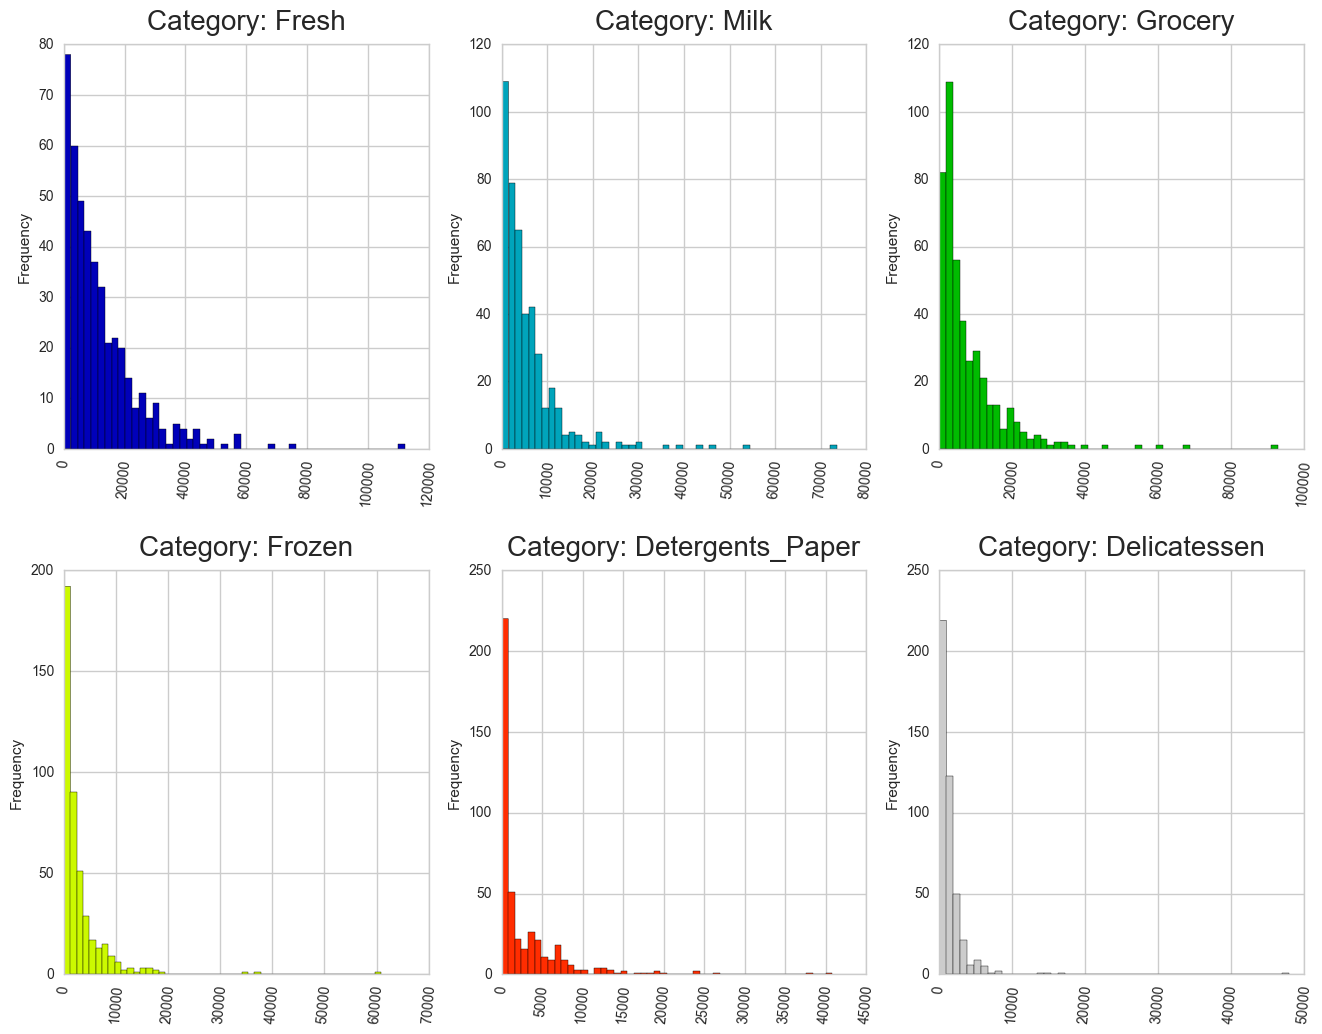

In [4]:
if __name__ == '__main__':
    
    fname = 'wholesale-customers'
    data =  load_data(fname)
    explore_data(data)

### Log(Data)

In [5]:
def transform_data(X):
    X_log = X.copy()
    for c in data.columns:
        X_log[c] = X_log[c].apply(lambda x: np.log(x))
    return(X_log)

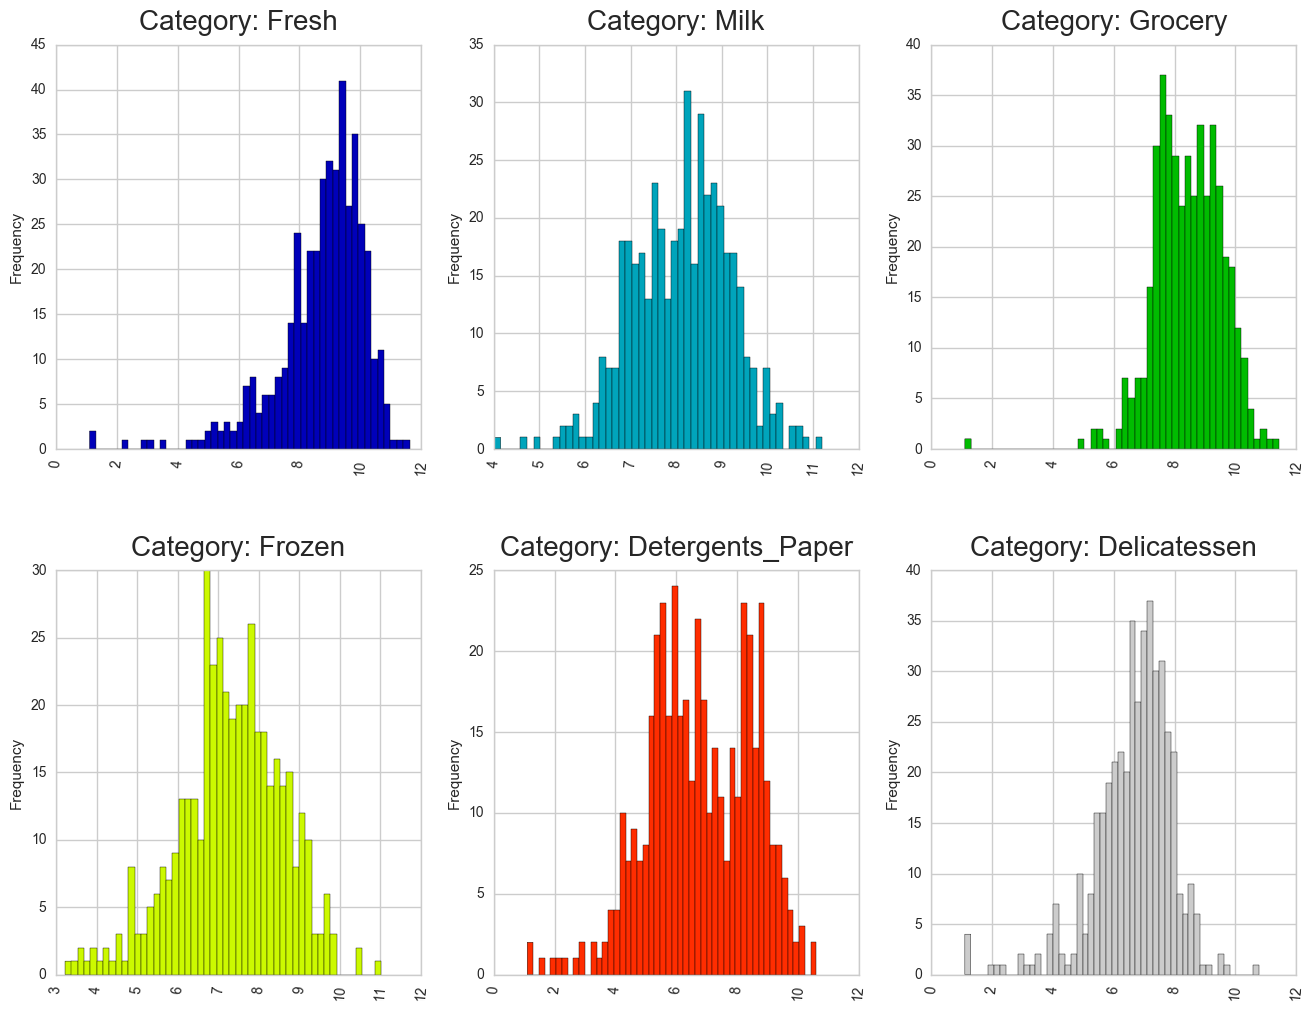

In [6]:
data_log = transform_data(data)
explore_data(data_log)

### Standardize Data

In [7]:
data_std = StandardScaler().fit_transform(data_log)

### Dimensionality Reduction

1 Principal Components -- Ex. Variance Ratio: 0.29777    
2 Principal Components -- Ex. Variance Ratio: 0.23383    
3 Principal Components -- Ex. Variance Ratio: 0.14725    
4 Principal Components -- Ex. Variance Ratio: 0.14300    
5 Principal Components -- Ex. Variance Ratio: 0.09945    
6 Principal Components -- Ex. Variance Ratio: 0.07870    


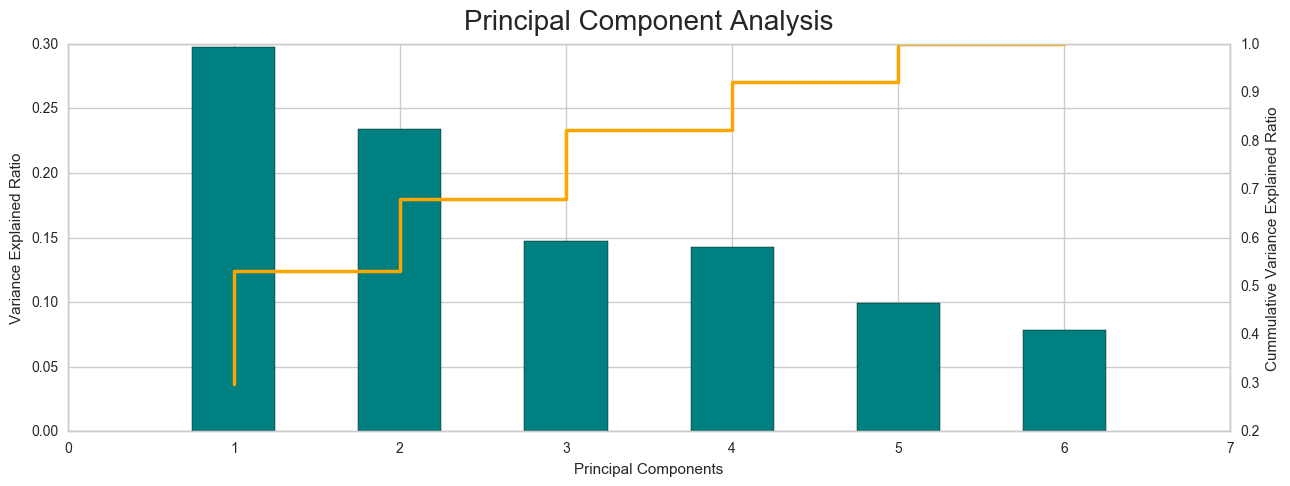

In [46]:
#Apply SVD
try:
    U,S,V = np.linalg.svd(data_std)
except Exception as e:
    print(str(e))

ex_var_ratio = [i/np.sum(S) for i in S]
for i in range(len(ex_var_ratio)):
    print('{0} Principal Components -- Ex. Variance Ratio: {1:.5f}\
    '.format(i+1,ex_var_ratio[i]))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax1 = ax.twinx()
ax.bar(np.arange(1,data_std.shape[1]+1,1),ex_var_ratio,align='center',color='teal',width=0.5)
ax.set_xlabel('Principal Components')
ax.set_ylabel('Variance Explained Ratio')

ax1.step(np.arange(1,data_std.shape[1]+1,1),np.cumsum(ex_var_ratio),color='orange',label='Cummulative Variance',lw=2.5)
ax1.set_ylabel('Cummulative Variance Explained Ratio')
plt.title('Principal Component Analysis',fontsize=20,y=1.02)
plt.grid(False)

** Choose 'k' Principal Components that Explains Highest Percent of Variance **


4 PCs Explain 0.82185 of Total Variance


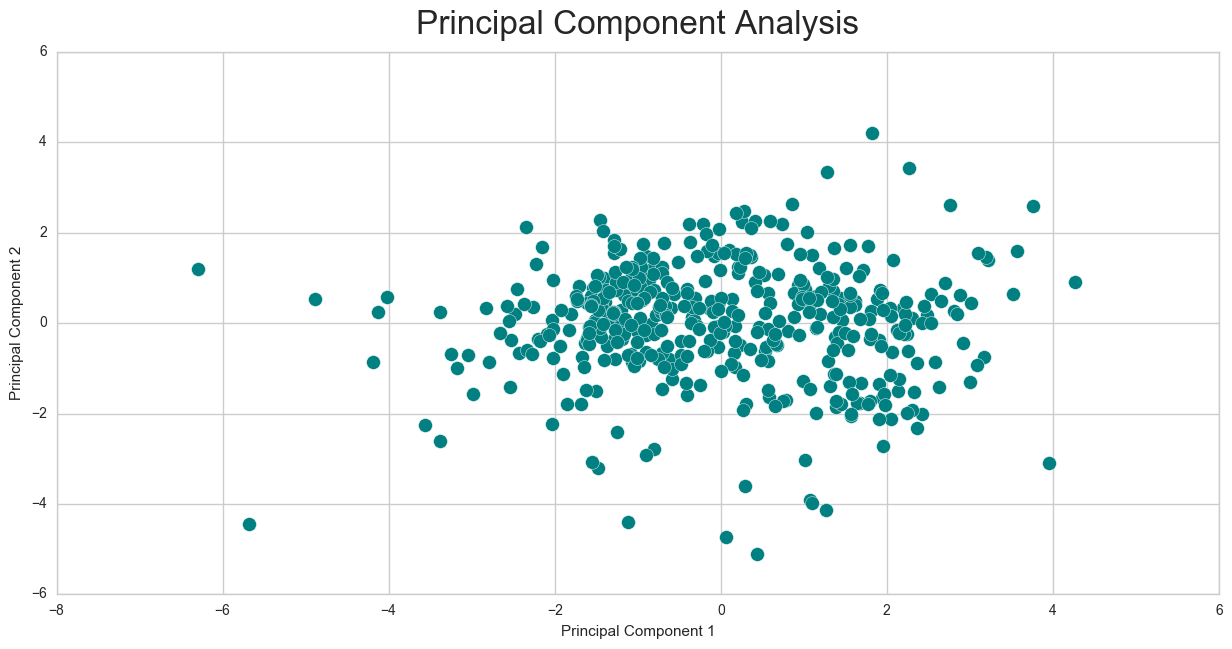

In [55]:
#Explained Variance -- Top K eigenvalues
k = 4
print('\n{0} PCs Explain {1:.5f} of Total Variance'.format(k,np.sum(ex_var_ratio[:k])))

#Projection 
proj = data_std.dot(V.T[:,:k])
fig = plt.figure(figsize=(15,7))

#Scatter Plot
ax = fig.add_subplot(111)
ax.scatter(proj[:,0],proj[:,1],c='teal',s=100,edgecolor='w')
ax.set_ylabel('Principal Component 2')
ax.set_xlabel('Principal Component 1')
ax.set_title('Principal Component Analysis',fontsize=24,y=1.02)

** Applying SKLEARN (example)**


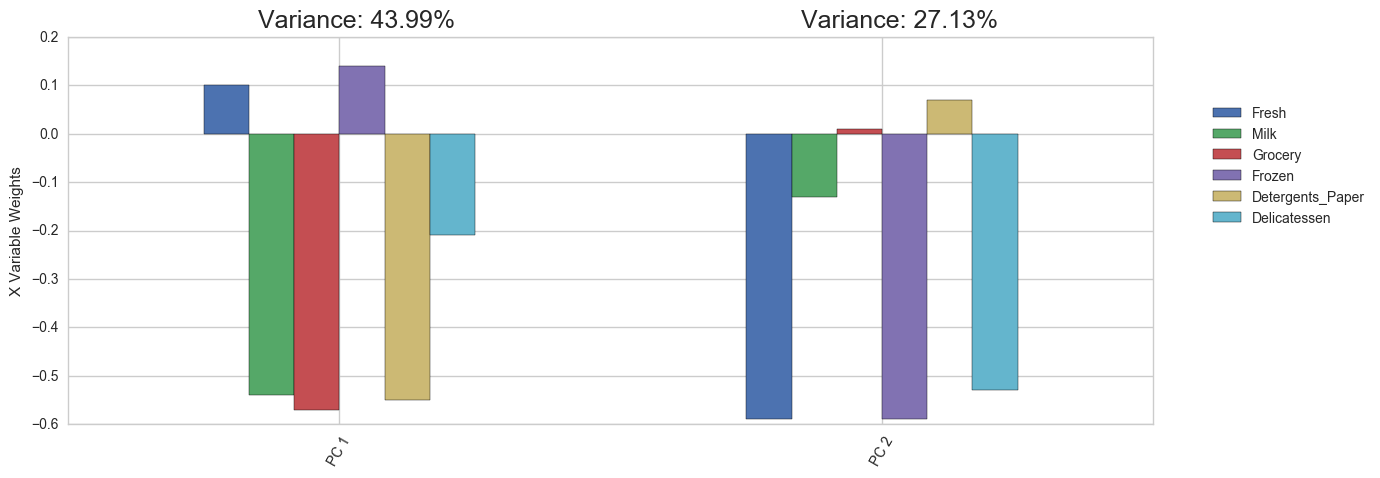

In [84]:
k = 2
pc = PCA(n_components=k)
pca = pc.fit(data_std)

# Get Total Dimensions
dim = ['PC {}'.format(i) for i in range(1,len(pc.components_)+1)]

# Store Principal Components in DataFrame
pc_components = pd.DataFrame(np.round(pca.components_, k), columns = list(data))
pc_components.index = dim 


#PCA explained variance
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) #reshape(n_rows,1col)
variance_ratios = pd.DataFrame(np.round(ratios, k), columns = ['Explained Variance'])
variance_ratios.index = dim

# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,5))

# Plot the feature weights as a function of the components
pc_components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("X Variable Weights")
ax.set_xticklabels(dim, rotation=60)

# Display the explained variance ratios
for i, exp_var in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.15, ax.get_ylim()[1] + 0.02, "Variance: {0:.2f}%".format(exp_var*100),fontsize=18)

ax.legend(loc=(1.05,.50))